In [1]:
import pandas as pd
import numpy as np



from sklearn import tree
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

import sklearn


In [3]:
df = pd.read_csv("heart.csv")
display(df.head(10))
print(df.shape)
df.info()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
#missing value 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df = df.rename(columns={'age':'Age', 
                        'sex':'Sex',
                        'cp': 'Chest_Pain',
                        'trestbps': 'Resting_Blood_Pressure',
                        'chol': 'Cholestoral',
                        'fbs': 'Fasting_Blood_Sugar',
                        'restecg': 'Rest_ECG',
                        'thalach': 'Max_Heart_Rate',
                        'exang': 'Exercise_Induced_Aangina',
                        'oldpeak': 'Oldpeak',
                        'slope': 'Slope',
                        'ca': 'CA',
                        'thal': 'Defectivity',
                        'target': 'Have_disease?'})

print(df.head())
display(df.head())

   Age  Sex  Chest_Pain  Resting_Blood_Pressure  Cholestoral  \
0   63    1           3                     145          233   
1   37    1           2                     130          250   
2   41    0           1                     130          204   
3   56    1           1                     120          236   
4   57    0           0                     120          354   

   Fasting_Blood_Sugar  Rest_ECG  Max_Heart_Rate  Exercise_Induced_Aangina  \
0                    1         0             150                         0   
1                    0         1             187                         0   
2                    0         0             172                         0   
3                    0         1             178                         0   
4                    0         1             163                         1   

   Oldpeak  Slope  CA  Defectivity  Have_disease?  
0      2.3      0   0            1              1  
1      3.5      0   0            2        

,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Cholestoral,Fasting_Blood_Sugar,Rest_ECG,Max_Heart_Rate,Exercise_Induced_Aangina,Oldpeak,Slope,CA,Defectivity,Have_disease?
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.drop(['Slope', 'CA', 'Defectivity'], axis=1, inplace=True)
display(df.head())

,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Cholestoral,Fasting_Blood_Sugar,Rest_ECG,Max_Heart_Rate,Exercise_Induced_Aangina,Oldpeak,Have_disease?
0,63,1,3,145,233,1,0,150,0,2.3,1
1,37,1,2,130,250,0,1,187,0,3.5,1
2,41,0,1,130,204,0,0,172,0,1.4,1
3,56,1,1,120,236,0,1,178,0,0.8,1
4,57,0,0,120,354,0,1,163,1,0.6,1


In [9]:
#one hot encoding 
df = pd.get_dummies(df, drop_first=True)


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       303 non-null    int64  
 1   Sex                       303 non-null    int64  
 2   Chest_Pain                303 non-null    int64  
 3   Resting_Blood_Pressure    303 non-null    int64  
 4   Cholestoral               303 non-null    int64  
 5   Fasting_Blood_Sugar       303 non-null    int64  
 6   Rest_ECG                  303 non-null    int64  
 7   Max_Heart_Rate            303 non-null    int64  
 8   Exercise_Induced_Aangina  303 non-null    int64  
 9   Oldpeak                   303 non-null    float64
 10  Have_disease?             303 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 26.2 KB


In [11]:

X = df.drop('Sex', axis=1)
y = df[['Sex']]

print("Features:" ,X.shape)
print("Targets:" ,y.shape)

Features: (303, 10)
Targets: (303, 1)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(242, 10) (61, 10) (242, 1) (61, 1)


In [29]:
class_0_train = y_train['Sex'].value_counts().values[0]
class_1_train = y_train['Sex'].value_counts().values[1]

train_ratio = class_1_train/class_0_train
print("Training Ratio: ",train_ratio)

Training Ratio:  0.4666666666666667


In [30]:
class_0_test = y_test['Sex'].value_counts().values[0]
class_1_test = y_test['Sex'].value_counts().values[1]

test_ratio = class_1_test/class_0_test
print("Test Ratio: ",test_ratio)

Test Ratio:  0.4523809523809524


In [31]:
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)

In [32]:
y_pred = model.predict(X_test)

In [33]:
y_test['probability'] = np.round(model.predict_proba(X_test)[:,1], 2)
y_test['predicted_Sex'] = y_pred

display(y_test.sample(10))

,Sex,probability,predicted_Sex
23,1,1.0,1
209,1,1.0,1
208,1,1.0,1
293,1,0.0,0
20,1,0.0,0
257,1,1.0,1
233,1,1.0,1
214,1,1.0,1
4,0,0.0,0
199,1,1.0,1


In [34]:
clf = DecisionTreeClassifier(max_depth=3) #max_depth is maximum number of levels in the tree
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

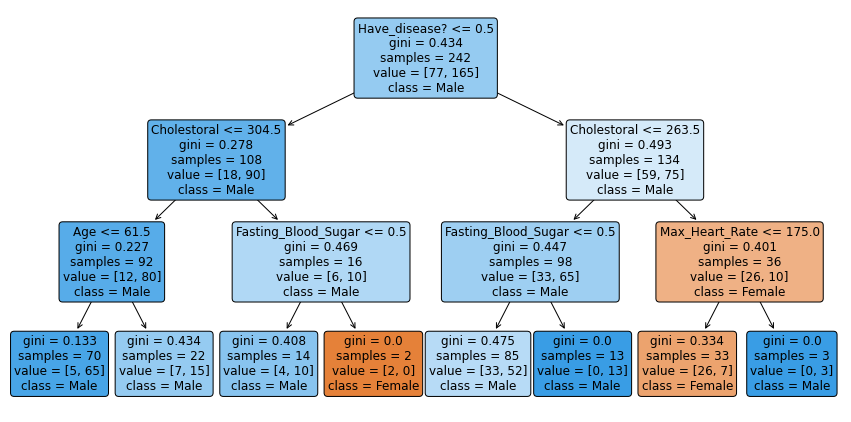

In [35]:
plt.figure(figsize=(15,7.5))
visualize_tree = plot_tree(clf, 
              feature_names= X.columns, 
              class_names= ["Female",  "Male"], 
              filled=True, 
              rounded=True, 
              fontsize=12)

In [36]:
confusion_matrix_ = confusion_matrix(y_test['Sex'], 
                                     y_test['predicted_Sex'])

print('confusion_matrix: \n', confusion_matrix_)

confusion_matrix: 
 [[ 8 11]
 [15 27]]


In [37]:
TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)


FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

True Positives =  27
True Negatives =  8
False Positives =  11
False Negatives =  15


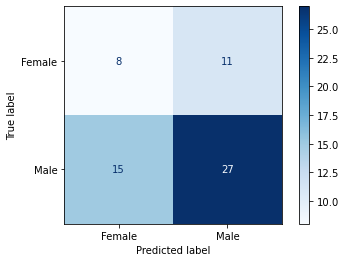

In [41]:
plot_confusion_matrix(model, 
                      X_test, 
                      y_test['Sex'], 
                      display_labels=["Female", "Male"],
                      cmap='Blues')
plt.show()

In [26]:
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR*100,"%") 
print("False Positive Rate = ", FPR*100,"%")

True Positive Rate =  71.0 %
False Positive Rate =  52.0 %


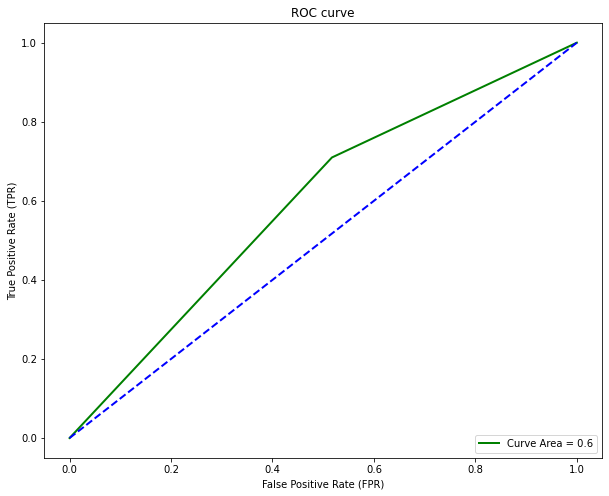

In [27]:
fpr, tpr, thr = roc_curve(y_test['Sex'], 
                          y_test['predicted_Sex'])
auc = np.round(roc_auc_score(y_test['Sex'], 
                             y_test['predicted_Sex']), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()